In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
from random import random
#from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import  Ridge
from sklearn.preprocessing import PolynomialFeatures

In [2]:
def regression(model, x_train, y_train, x_test, y_test) :
    std = StandardScaler().fit(x_train)
    regr_type = model.fit(std.transform(x_train),y_train)
    y_predicited = regr_type.predict(std.transform(x_test))
    return y_predicited, regr_type.score(std.transform(x_test),y_test), regr_type.coef_   

In [3]:
#np.random.seed(0)
x = 2 - np.linspace(-5,5,num=60) *4 #generate the X data  
y = x - 0.2 * (x ** 2) + 0.05 * (x ** 3)  + np.random.normal(-110, 110, size=x.size) +2 #generate target points y

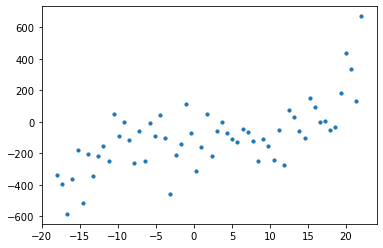

In [4]:
x = x[:, np.newaxis]
y = y[:, np.newaxis]
plt.scatter(x,y, s=10)
plt.show()

0.4280202233126632

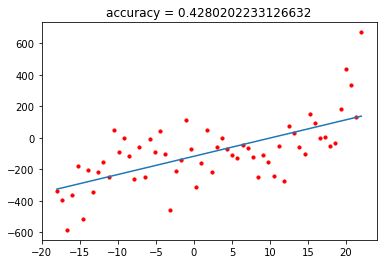

In [7]:
y_pred, score, coef = regression(LinearRegression(), x, y, x, y)
plt.plot(x, y_pred)  #L = 0.0028
plt.scatter(x,y, s=10,color='r')
plt.title('accuracy = {}'.format(score))
score

In [8]:
def polynomial_convert(X,degree):
    '''
    X : like array 
       dataset
    degree : int 
       number of powers
    '''
    return PolynomialFeatures(degree=degree).fit_transform(X)   
   

Text(0.5, 1.0, 'accuracy = 0.6510240408593411')

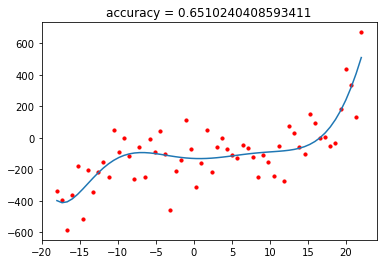

In [204]:
x_poly = polynomial_convert(x, 7)
y_pred, score, coef = regression(LinearRegression(), x_poly, y, x_poly, y)
plt.plot(x, y_pred)  #L = 0.0028
plt.scatter(x,y, s=10,color='r')
plt.title('accuracy = {}'.format(score))

<ipython-input-2-45b93e132574>:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_type = model.fit(std.transform(x_train),y_train)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 455436.6365160752, tolerance: 259.6120048037775
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'accuracy = 0.6491405419712325')

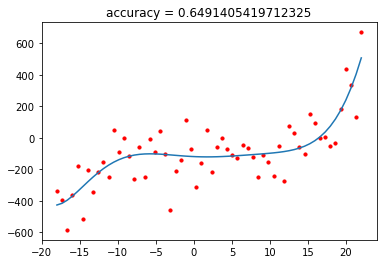

In [205]:
y_pred, score, coef = regression( Lasso(alpha=0), x_poly, y, x_poly, y)
plt.plot(x, y_pred)  #L = 0.0028
plt.scatter(x,y, s=10,color='r')
plt.title('accuracy = {}'.format(score))

In [86]:
10e+0

10.0

In [234]:
y_pred, score, coef = regression(LinearRegression(), x_poly, y, x_poly, y)
weights = np.array([])
alphas = [10e-4,10e-3,10e-2,10e-1,1]
print(weights.shape)
for alpha in alphas:
    y_pred, score, coef = regression( Lasso(alpha=alpha), x_poly, y, x_poly, y)
    if weights.shape[0]>0 : 
        weights = np.vstack([weights,coef])
    else :
        weights = coef
weights = weights.T   


(0,)


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 450465.50492032256, tolerance: 259.6120048037775
  model = cd_fast.enet_coordinate_descent(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 406588.1708267784, tolerance: 259.6120048037775
  model = cd_fast.enet_coordinate_descent(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73421.37480718724, tolerance: 259.6120048037775
  model = cd_fast.enet_coordinate_descent(


In [222]:
weights[1,:]

array([-25.45562725, -25.78042738])

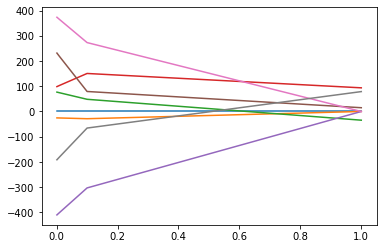

In [236]:

for i in range(weights.shape[0]):
    plt.plot(np.array(alphas),(weights[i,:]))


In [237]:
print(weights)

[[   0.            0.            0.            0.            0.        ]
 [ -25.45562725  -25.78042738  -28.68323107   -0.           -0.        ]
 [  76.72657011   74.09694776   48.27883249  -34.51128229  -34.51128229]
 [  98.51469504  103.43956634  150.63289014   93.71454316   93.71454316]
 [-409.97571931 -400.09096955 -303.00611882   -0.           -0.        ]
 [ 231.43372822  217.22044155   79.25158766   14.87506864   14.87506864]
 [ 373.46101629  364.18459987  273.03460513    0.            0.        ]
 [-191.41827749 -179.73814279  -65.72292334   78.79365473   78.79365473]]


In [238]:
y_pred, score, coef = regression(LinearRegression(), x_poly, y, x_poly, y)
weights = np.array([])
alphas = [1,10,100,1000]
print(weights.shape)
for alpha in alphas:
    y_pred, score, coef = regression( Lasso(alpha=alpha), x_poly, y, x_poly, y)
    if weights.shape[0]>0 : 
        weights = np.vstack([weights,coef])
    else :
        weights = coef
weights = weights.T   

(0,)


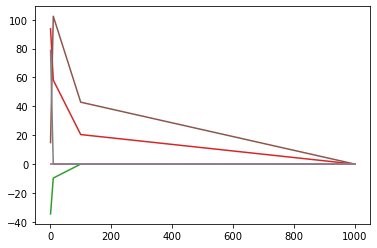

In [239]:

for i in range(weights.shape[0]):
    plt.plot(np.array(alphas),(weights[i,:]))